<a href="https://colab.research.google.com/github/karnavivek/Predicting-Numbers-using-CNN/blob/main/Predicting_numbers_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import time
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [ ]:
df_train = pd.read_csv("/content/sample_data/mnist_train_small.csv", header=None)
df_test = pd.read_csv("/content/sample_data/mnist_test.csv", header=None)
df_train.shape, df_test.shape

((20000, 785), (10000, 785))

In [ ]:
# new_row = pd.DataFrame([['pix_val'] * df_test.shape[1]], columns = df_test.columns)
# df_test = pd.concat([new_row, df_test])
df_test.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = df_train[0]
y_test = df_test[0]
y_train.shape, y_test.shape

((20000,), (10000,))

In [ ]:
df_train = df_train.drop(0, axis = 1)
df_test = df_test.drop(0, axis = 1)
df_train

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train = df_train.copy()
X_test = df_test.copy()
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((20000, 784), (10000, 784), (20000,), (10000,))

In [ ]:
X_train

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#converting all the pandas dataframe into readable scripts
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_train, X_test, y_train, y_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([6, 5, 7, ..., 2, 9, 5]),
 array([7, 2, 1, ..., 4, 5, 6]))

In [ ]:
X_train = X_train/255.
X_test = X_test/255.

In [ ]:

# Assuming X_train is your input data of shape (num_samples, 784)
X_train = X_train.reshape(-1, 28, 28, 1)  # Reshape to (num_samples, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [ ]:
model = Sequential()

model.add(Conv2D(28,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(56,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(56,(3,3), activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 11, 11, 56)          │          14,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 56)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 3, 3, 56)            │          28,280 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,728 (166.91 KB)

 Trainable params: 42,728 (166.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(Flatten())
model.add(Dense(56, activation='relu'))
model.add(Dense(10))

In [ ]:
print(X_train.shape)
print(model.input_shape)

(20000, 28, 28, 1)
(None, 28, 28, 1)


In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.9953 - loss: 0.0138 - val_accuracy: 0.9830 - val_loss: 0.0605
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9953 - loss: 0.0119 - val_accuracy: 0.9871 - val_loss: 0.0470
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 37ms/step - accuracy: 0.9987 - loss: 0.0044 - val_accuracy: 0.9866 - val_loss: 0.0567
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 32ms/step - accuracy: 0.9992 - loss: 0.0034 - val_accuracy: 0.9878 - val_loss: 0.0479
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9961 - loss: 0.0134 - val_accuracy: 0.9855 - val_loss: 0.0537
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 35ms/step - accuracy: 0.9969 - loss: 0.0089 - val_accuracy: 0.9868 - val_loss: 0.0516
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.9982 - loss: 0.0043 - val_accuracy: 0.9883 - val_loss: 0.0490
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9985 - loss: 0.0047 - 

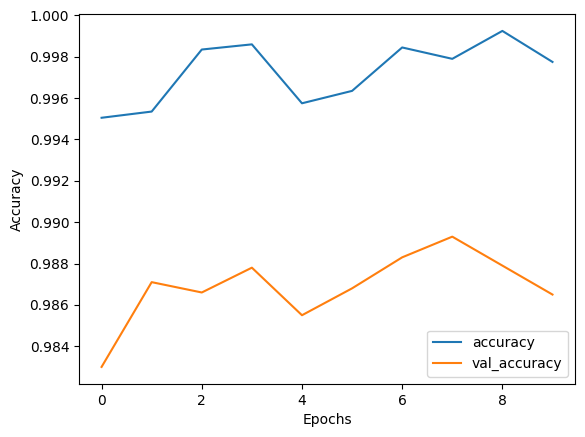

In [ ]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

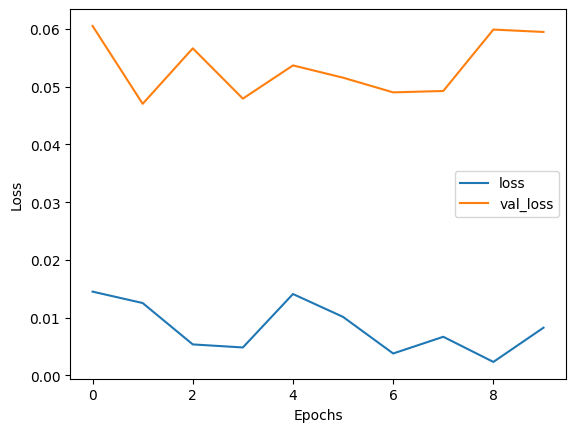

In [ ]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(X_test)
pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[ -9.993248 ,  -1.0764703,  -6.312019 , ...,  28.652431 ,
         -5.967919 ,  -1.7894055],
       [  5.5087676,  12.178022 ,  26.429684 , ...,  -5.1442347,
         -4.82183  , -20.648136 ],
       [ -5.330555 ,  12.666131 ,  -3.564389 , ...,  -7.062787 ,
         -4.076777 , -12.27916  ],
       ...,
       [-12.80946  ,   5.213296 ,  -4.8937364, ..., -11.104956 ,
          4.8111153,  -1.9115156],
       [ -3.3637047,  -8.744774 , -16.39117  , ..., -11.8498335,
          4.355955 ,  -7.194372 ],
       [ -6.9931355,  -5.6903014,  -5.3109145, ..., -15.686056 ,
         -9.160468 , -24.223051 ]], dtype=float32)

In [ ]:
pred[0]

array([ -9.993248  ,  -1.0764703 ,  -6.312019  ,  -0.14236315,
       -11.986781  ,  -7.9712167 , -29.826178  ,  28.652431  ,
        -5.967919  ,  -1.7894055 ], dtype=float32)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
finals = []
for i in pred:
  y_pred = np.argmax(pred[i])
  finals =+ y_pred
finals

IndexError: arrays used as indices must be of integer (or boolean) type